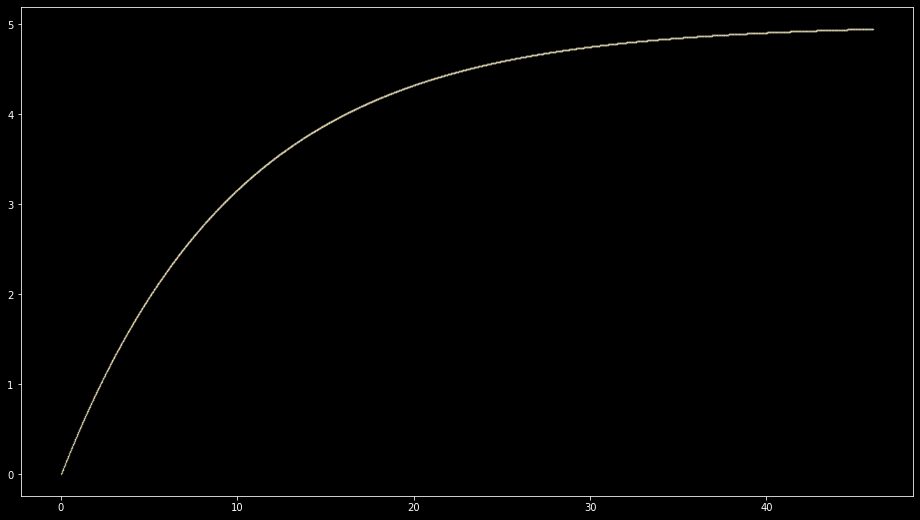

In [1]:
import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"]=(16,9)
#plt.rcParams["figure.dpi"]=300

emf = 5
R = 100
C = 0.1
Q = 0

t = 0
dt = 0.01
Vc = Q/C
while Vc<(0.99*emf):
    dQ = dt*(emf-Q/C)/R
    Q=Q+dQ
    t=t+dt
    Vc = Q/C
    plt.scatter(t,Vc,s=0.1)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin,cos,pi
import scipy
from scipy.signal import butter


In [40]:
t = np.linspace(0,1,1000)
signal = 3.5*sin(2*pi*10*t) + sin(2*pi*40*t) + sin(2*pi*8*t)

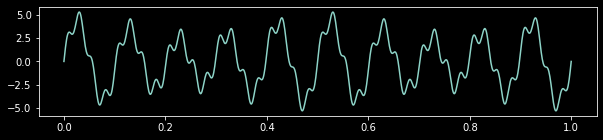

In [41]:
plt.figure(figsize=(10,2))
plt.plot(t,signal)

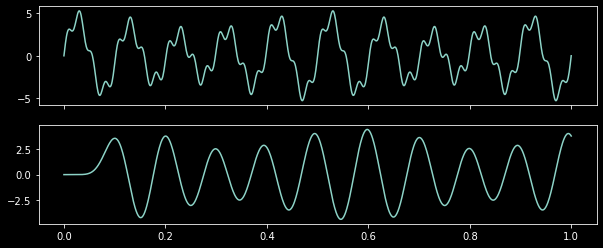

In [44]:
sos = butter(10,15,'lp',fs=1000,output='sos')
filtered = scipy.signal.sosfilt(sos,signal)
fig,ax = plt.subplots(2,1,sharex=True,figsize=(10,4))
ax[0].plot(t,signal)
ax[1].plot(t,filtered)

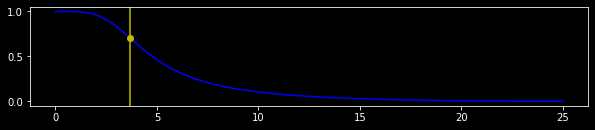

In [51]:
import numpy as np
from scipy.signal import butter,lfilter,freqz
import matplotlib.pyplot as plt

def butter_filter(cutoff,fs,order):
    nyq = 0.5*fs
    normal_cutoff = cutoff/nyq
    b,a = butter(order,normal_cutoff,btype='low',analog=False)
    return b,a

def lowpass(data,cutoff,fs,order):
    b,a = butter_filter(cutoff,fs,order=order)
    y = lfilter(b,a,data)
    return y

order = 2 # Order of filter
fs = 50 # Sample rate in Hz
cutoff = 3.667 # desired cutoff frequency of filter in Hz

b,a = butter_filter(cutoff,fs,order)

w,h = freqz(b,a,worN=8000)
plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.plot(0.5*fs*w/pi,np.abs(h),'b')
plt.plot(cutoff,0.5*np.sqrt(2),'yo')
plt.axvline(cutoff,color='y')


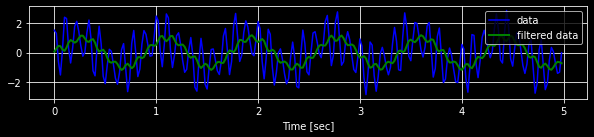

In [50]:
# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 5.0             # seconds
n = int(T * fs)     # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = lowpass(data, cutoff, fs, order)
plt.figure(figsize=(10,4))
plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()